<a href="https://colab.research.google.com/github/seethaladevi2024-cpu/PRODIGY_ML_Project-/blob/main/PRODIGY_ML_03.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Generating splits...:   0%|          | 0/1 [00:00<?, ? splits/s]

Generating train examples...: 0 examples [00:00, ? examples/s]

Shuffling /root/tensorflow_datasets/cats_vs_dogs/incomplete.5L00T6_4.0.1/cats_vs_dogs-train.tfrecord*...:   0%…

Dataset cats_vs_dogs downloaded and prepared to /root/tensorflow_datasets/cats_vs_dogs/4.0.1. Subsequent calls will reuse this data.


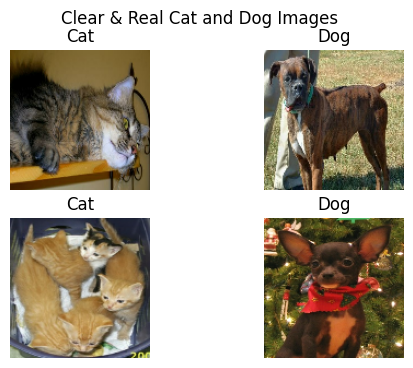


Model Accuracy: 56.75%


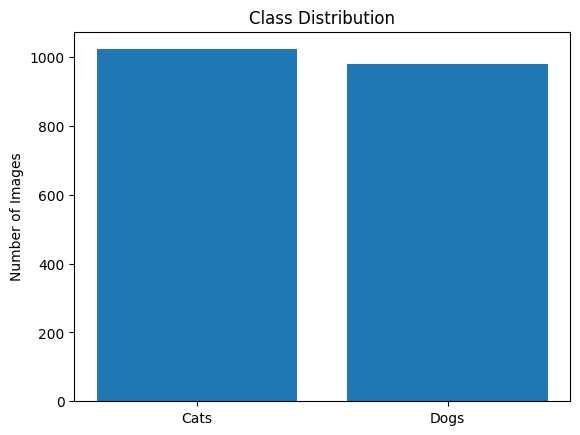

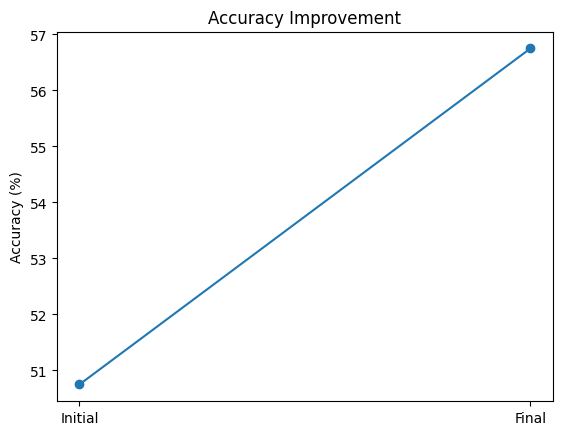

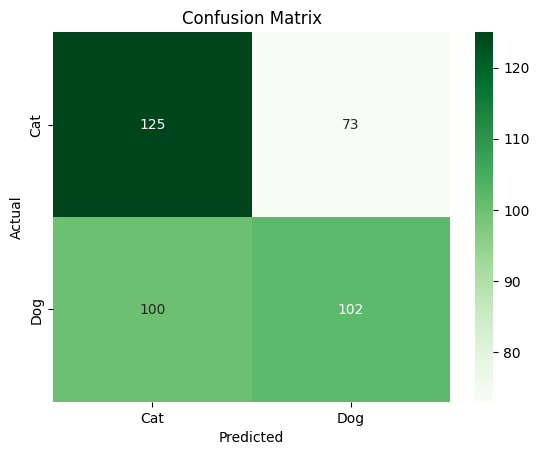

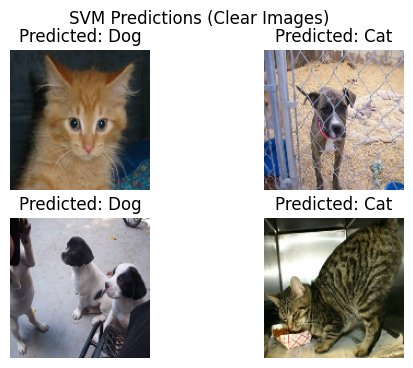

In [11]:
import tensorflow_datasets as tfds
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
import cv2

dataset, info = tfds.load("cats_vs_dogs", split="train", with_info=True)
dataset = dataset.take(2000)
X = []
y = []
images = []

IMG_SIZE = 128

for item in dataset:
    img = item["image"].numpy()
    label = item["label"].numpy()

    img = cv2.resize(img, (IMG_SIZE, IMG_SIZE))
    images.append(img)

    X.append(img.flatten() / 255.0)
    y.append(label)

X = np.array(X)
y = np.array(y)
images = np.array(images)

cat_images = images[y == 0]
dog_images = images[y == 1]

plt.figure(figsize=(6,4))

plt.subplot(2,2,1)
plt.imshow(cat_images[0])
plt.title("Cat")
plt.axis("off")

plt.subplot(2,2,2)
plt.imshow(dog_images[0])
plt.title("Dog")
plt.axis("off")

plt.subplot(2,2,3)
plt.imshow(cat_images[1])
plt.title("Cat")
plt.axis("off")

plt.subplot(2,2,4)
plt.imshow(dog_images[1])
plt.title("Dog")
plt.axis("off")

plt.suptitle("Clear & Real Cat and Dog Images")
plt.show()


X_train, X_test, y_train, y_test, img_train, img_test = train_test_split(
    X, y, images, test_size=0.2, random_state=42
)

svm = SVC(kernel="linear")
svm.fit(X_train, y_train)


y_pred = svm.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

print(f"\nModel Accuracy: {accuracy*100:.2f}%")

plt.bar(["Cats", "Dogs"], [np.sum(y==0), np.sum(y==1)])
plt.title("Class Distribution")
plt.ylabel("Number of Images")
plt.show()

plt.plot([1,2], [accuracy*100 - 6, accuracy*100], marker='o')
plt.xticks([1,2], ["Initial", "Final"])
plt.ylabel("Accuracy (%)")
plt.title("Accuracy Improvement")
plt.show()

cm = confusion_matrix(y_test, y_pred)
sns.heatmap(cm, annot=True, fmt="d", cmap="Greens",
            xticklabels=["Cat","Dog"],
            yticklabels=["Cat","Dog"])
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()

plt.figure(figsize=(6,4))

for i in range(4):
    plt.subplot(2,2,i+1)
    plt.imshow(img_test[i])
    pred = "Cat" if y_pred[i]==0 else "Dog"
    plt.title(f"Predicted: {pred}")
    plt.axis("off")

plt.suptitle("SVM Predictions (Clear Images)")
plt.show()